<a href="https://colab.research.google.com/github/betheman/Deep-Learning/blob/master/Tensorflow_Logistics_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import seaborn as sns


Instructions for updating:
non-resource variables are not supported in the long term


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/LogisticRegression/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


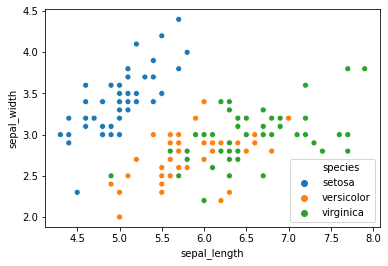

In [34]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue='species')

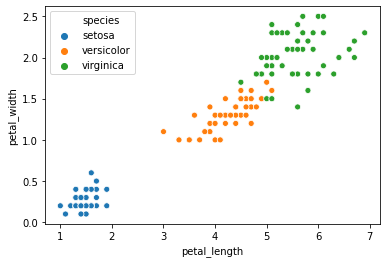

In [35]:
sns.scatterplot(x='petal_length',y='petal_width',data=df,hue='species')

In [4]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [0]:
X=df.iloc[:,0:-1]
y=df.iloc[:,4:]

In [0]:
from sklearn.utils import shuffle

In [0]:
X,y=shuffle(X,y)

In [0]:
def min_max_normalization(X):
    col_max=X.max()
    col_min=X.min()
    return (X-col_min)/(col_max-col_min)




In [0]:
X=min_max_normalization(X)

In [0]:
#y.species = y.species.replace(to_replace=['setosa', 'versicolor','virginica'], value=[0,1,2])

In [0]:
from sklearn.preprocessing import OneHotEncoder

oneHot=OneHotEncoder(sparse=False).fit(y)
y=oneHot.transform(y)


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
A = tf.Variable(tf.random_normal(shape=[4, 3]),dtype=tf.float32)
b = tf.Variable(tf.random_normal(shape=[1,3]),dtype=tf.float32)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [0]:
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])
target = tf.placeholder(dtype=tf.float32, shape=[None, 3])

In [0]:
mod = tf.matmul(data, A) + b

In [17]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=mod, labels=target))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
learning_rate = 0.01
iter_num = 8000

In [0]:
opt = tf.train.GradientDescentOptimizer(learning_rate)

In [0]:
goal = opt.minimize(loss)

In [0]:
prediction = tf.nn.softmax(mod)
# Bool into float32 type
correct = tf.cast(tf.equal(tf.arg_max(prediction,1), tf.arg_max(target,1)), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)

In [0]:
loss_trace = []
train_acc = []
test_acc = []

In [23]:
for epoch in range(iter_num):
    
    sess.run(goal, feed_dict={data: X_train, target: y_train})
    temp_loss = sess.run(loss, feed_dict={data: X_train, target: y_train})
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: X_train, target: y_train})
    temp_test_acc = sess.run(accuracy, feed_dict={data: X_test, target: y_test})
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    # output
    if (epoch + 1) % 300 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc, temp_test_acc))


epoch:  300 loss: 1.012013 train_acc: 0.410000 test_acc: 0.340000
epoch:  600 loss: 0.874325 train_acc: 0.510000 test_acc: 0.380000
epoch:  900 loss: 0.775718 train_acc: 0.670000 test_acc: 0.660000
epoch: 1200 loss: 0.702511 train_acc: 0.830000 test_acc: 0.780000
epoch: 1500 loss: 0.647051 train_acc: 0.840000 test_acc: 0.780000
epoch: 1800 loss: 0.603954 train_acc: 0.840000 test_acc: 0.780000
epoch: 2100 loss: 0.569581 train_acc: 0.850000 test_acc: 0.840000
epoch: 2400 loss: 0.541491 train_acc: 0.850000 test_acc: 0.860000
epoch: 2700 loss: 0.518038 train_acc: 0.860000 test_acc: 0.880000
epoch: 3000 loss: 0.498085 train_acc: 0.860000 test_acc: 0.880000
epoch: 3300 loss: 0.480835 train_acc: 0.880000 test_acc: 0.880000
epoch: 3600 loss: 0.465714 train_acc: 0.890000 test_acc: 0.860000
epoch: 3900 loss: 0.452302 train_acc: 0.900000 test_acc: 0.860000
epoch: 4200 loss: 0.440285 train_acc: 0.910000 test_acc: 0.860000
epoch: 4500 loss: 0.429421 train_acc: 0.910000 test_acc: 0.860000
epoch: 480

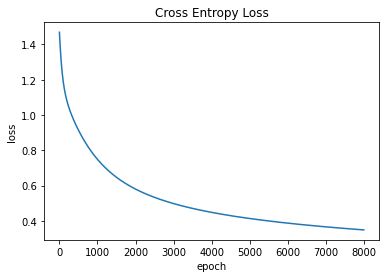

In [24]:
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

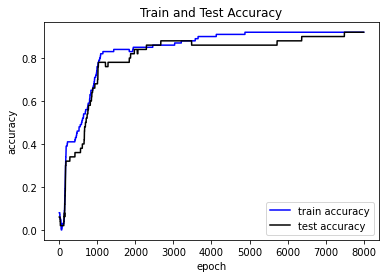

In [25]:
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()

In [26]:
# updated value of weights
sess.run(A)

array([[-0.5203105,  0.4673369,  1.7873098],
       [ 2.456855 , -1.6403936, -0.6846245],
       [-2.5969236,  1.9394777,  1.2852895],
       [-3.4270422, -1.8786825,  2.2430692]], dtype=float32)

In [0]:
mod = tf.matmul(data, A) + b
x=sess.run(mod,feed_dict={data:X_test})
predic=tf.nn.softmax(x)

In [0]:
predictions=sess.run(tf.arg_max(predic,1))

In [0]:
y_true=sess.run(tf.arg_max(y_test,1))

In [0]:
from sklearn.metrics import confusion_matrix,classification_report

In [31]:
confusion_matrix(y_true,predictions)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  3, 13]])

In [33]:
print(classification_report(y_true,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      0.94      0.89        18
           2       0.93      0.81      0.87        16

    accuracy                           0.92        50
   macro avg       0.93      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50

